# House Prices: Advanced Regression Techniques
[link]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data "Link"
[kaggle_link_house_prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  

train.csv: 1460x81  
test.csv: 1429x80
```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```




In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('train.csv')
X = data.iloc[:,1:-1].copy()
#y = data.iloc[:,-1]
y =  data.pop('SalePrice').values
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 確認是否有缺失

In [3]:
#X.info()
x_null_count = X.isnull().sum(axis = 0)
columns_name = X.columns.values
columns_has_nan_name = columns_name[x_null_count > 0]

print('Has %d columns Nan'%len(columns_has_nan_name))
x_null_count[x_null_count>0]
#print(X[columns_has_nan_name].iloc[:,:5].head())
#print(X[columns_has_nan_name].iloc[:,5:10].head())
#print(X[columns_has_nan_name].iloc[:,10:15].head())
#print(X[columns_has_nan_name].iloc[:,15:].head())

Has 19 columns Nan


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
class dataProcess:
    def __init__(self,aaa=0):
        self.options = {'aaa':aaa}
        self.caterogy_imputer_step = ('caterogy_imputer_step', SimpleImputer(strategy='constant',fill_value='MISSING')) 
        self.caterogy_encoder_step = ('caterogy_encoder_step', OneHotEncoder(sparse=False,handle_unknown='ignore')) 
        self.num_imputer_step = ('num_imputer_step', SimpleImputer(strategy='median'))
        self.num_scaler_step = ('num_scaler_step', StandardScaler())
        self.something = {
            'caterogy_pipe': Pipeline([self.caterogy_imputer_step, self.caterogy_encoder_step]),
            'num_pipe': Pipeline([self.num_imputer_step, self.num_scaler_step])
        }
    def fit(self, datax, datay=None):
        # X is pandas type
        kinds = np.array([dt.kind for dt in datax.dtypes])
        is_num = kinds != 'O'
        numeric_column_name = datax.columns.values[is_num]
        category_column_name = datax.columns.values[~is_num]
        self.ct_transformer = [('caterogy_transformer',self.something['caterogy_pipe'], category_column_name),('num_transformer',self.something['num_pipe'],numeric_column_name)]
        self.ct = ColumnTransformer(transformers=self.ct_transformer)        
    def transform(self, datax, datay=None):
        return self.ct.transform(datax)
    def fit_transform(self, datax, datay=None):
        self.fit(datax)
        return self.ct.fit_transform(datax)
    def set_params(self,**params):
        for p in params:
            if p in self.options:
                self.options[p] = params[p]
            else:
                s = p.split("__",1)
                hyperparameters = {}
                hyperparameters[s[1]] = params[p]
                self.something[s[0]].set_params(**hyperparameters)              
    def get_params(self,deep=True):
        return self.options
    def __repr__(self):
        msg="\n"
        msg += str(self.something['caterogy_pipe'].named_steps['caterogy_imputer_step'])
        msg += "\n"
        msg += str(self.something['caterogy_pipe'].named_steps['caterogy_encoder_step'])
        msg += "\n"
        msg += str(self.something['num_pipe'].named_steps['num_imputer_step'])
        msg += "\n"
        msg += str(self.something['num_pipe'].named_steps['num_scaler_step'])
        return msg

#param_grid = {
#    'dataProcess__caterogy_pipe__caterogy_imputer_step__fill_value': ['AAA','BBB'],
#    'dataProcess__num_pipe__num_imputer_step__strategy': ['median','mean'],
#    'SVC__kernel': ['linear','poly'],
#    'SVC__C': [0.01,0.1,1,10,100,1000],
#}


6736.913071554303


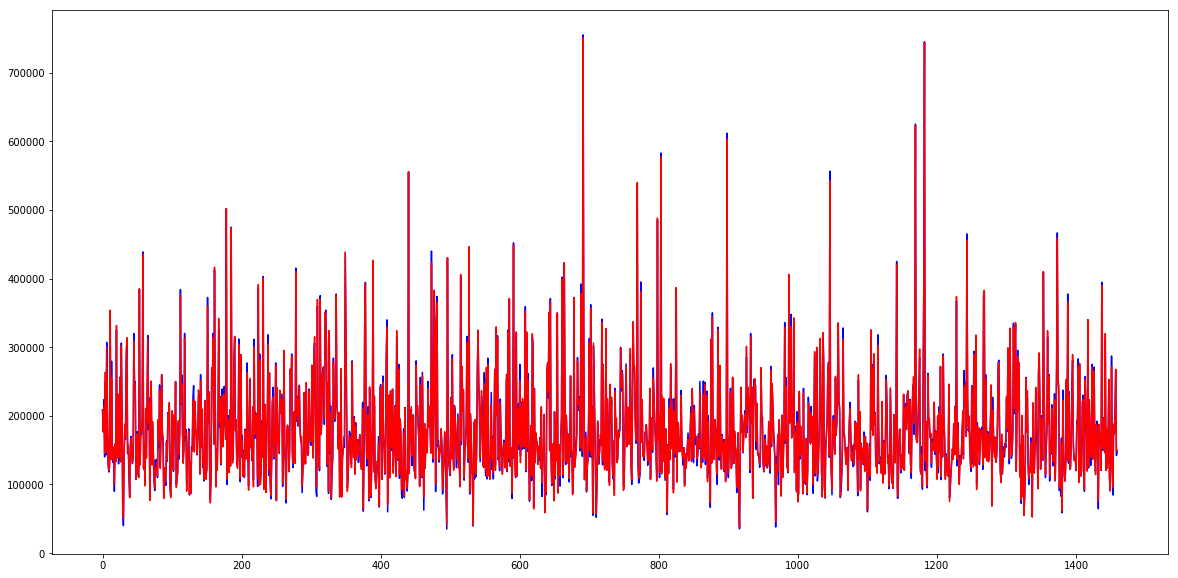

In [8]:
from sklearn.linear_model import Ridge 
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

# loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('GradientBoostingRegressor',  GradientBoostingRegressor(n_estimators=500,criterion='friedman_mse',  loss='ls',learning_rate=0.1,max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2))])

#criterion: mse,mae
#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('RandomForestRegressor', RandomForestRegressor(n_estimators=500,criterion='mse', max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2))])

#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('svr', SVR(kernel='poly', C=1,degree=3, gamma=1))])
# 1) call dataProcess fit_transform() --> Ridge()
ml_pipe.fit(X,y)
prediction = ml_pipe.predict(X)
print(np.sqrt(mean_squared_error(y_pred=prediction,y_true=y)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
x = np.arange(len(y))
plt.plot(x,y,c='b')
plt.plot(x,prediction,c='r')
plt.show()

### K Fold

In [9]:
#l_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
#l_pipe = Pipeline([('dataProcess',dataProcess()), ('svr', SVR(kernel='poly', C=1,degree=3, gamma=1))])
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rms_kfold = []
for train_index, validation_index in kf.split(X):
    # X is pandas type
    X_train, X_validation =  X.iloc[train_index],  X.iloc[validation_index]
    # y is ndarray type
    y_train, y_validation = y[train_index], y[validation_index]
    ml_pipe.fit(X_train, y_train)
    prediction = ml_pipe.predict(X_validation)
    rms_kfold.append(np.sqrt(mean_squared_error(y_pred=prediction,y_true=y_validation)))

np.mean(rms_kfold)

27005.6431170045

### Grid Search

In [7]:
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
param_grid = {
    'dataProcess__num_pipe__num_imputer_step__strategy': ['median','mean'],
    'ridge__alpha': [.001, 0.1, 1.0, 5, 10, 50, 100, 1000],
    }
kf = KFold(n_splits=5, shuffle=True, random_state=123)
# estimator need provide a score function
gsearch = GridSearchCV(estimator=ml_pipe, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
gsearch.fit(X, y)
gsearch.best_params_, gsearch.best_score_

({'dataProcess__num_pipe__num_imputer_step__strategy': 'median',
  'ridge__alpha': 10},
 -1142405513.1486788)

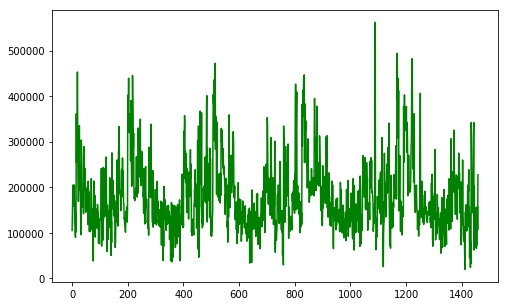

In [12]:
data2 = pd.read_csv('./test.csv')
data2.head()

X2 = data2.iloc[:,1:]
#prediction = best_ml_pipe.predict(X2)
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge(alpha=10))])
ml_pipe.fit(X,y)

prediction = ml_pipe.predict(X2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))

x = np.arange(len(X2))
plt.plot(x,prediction,c='g')
plt.show()
# Output Result
result_pd = pd.DataFrame(prediction,columns=['SalePrice'])
result_pd.index += 1461
result_pd.head()
result_pd.to_csv('result.csv',index=True, index_label='Id')

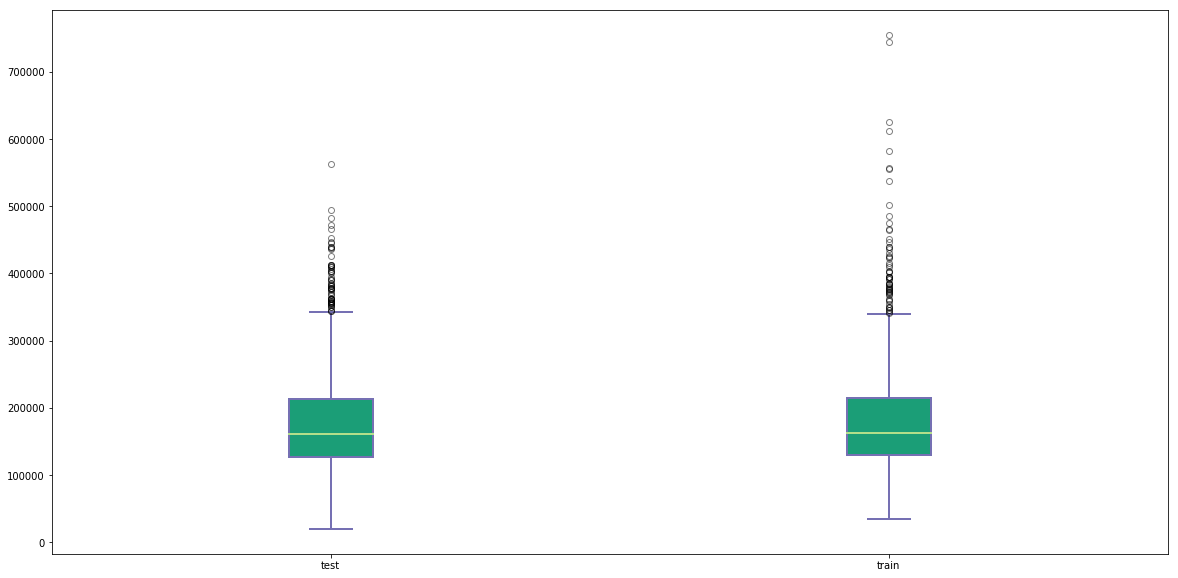

In [13]:
plt.figure(figsize=(20,10))
bp = plt.boxplot([prediction,y],patch_artist=True,  labels=('test','train'))
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
# 垂直線部分
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
# Q3,Q1上下四分位數    
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## 畫出中位數
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)   
## change the style of fliers and their fill
# outlier 離群值
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()